In [10]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
df = tf.keras.datasets.cifar10.load_data()

In [5]:
(X_train, y_train), (X_test,y_test) = df

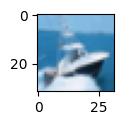

In [6]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[8])

In [7]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)




X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


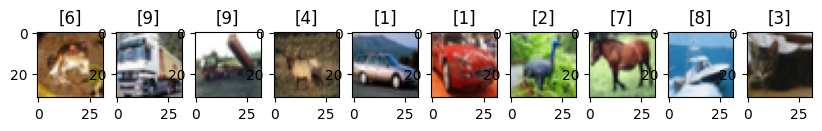

In [8]:
plt.figure(figsize=(10,2))
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.title(str(y_train[i]))
    plt.imshow(X_train[i])

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
# Now lets scale the data/ images so that our model performs better
# i.e we want values between 0-1 so that the model can be trained easily
# so we will divide by 255 coz the RGB values are between 0-255

In [40]:
x_trained_scaled = X_train/255

In [41]:
x_test_scaled = X_test/255

In [42]:
y_train[0]

array([6], dtype=uint8)

In [43]:
# Now we will convert the y_train data into one hot encoding

In [44]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10)



In [45]:
# As we can see that 0th element in the y_train is 6 and the position of 1 in the y_train_categorical[0] is at the 6th position
# starting from 0

y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [46]:
# Same goes with the y_test as well

In [47]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [48]:
# Now lets train the model
# Sequential api is used to train the model it contains input layer middle layer and the output layer
# for the middle layer relu activation function is preferred
# for the output layer the sigmoid activation function is preferred as it is good in classification


model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

# Since our data is big we will use stocastic gradient descednt(SGD)
# categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels
# accuracy: tells how many correct predictions are made by the model divided by the total no. of prediction
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_trained_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3577 - loss: 1.8087


In [53]:
# lets now see the 1st element of y_test which is 3
y_test[0]

array([3], dtype=uint8)

In [54]:
# So now lets predict the image using our model 
model.predict(x_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([0.32400107, 0.70789313, 0.63847363, 0.87591946, 0.43845993,
       0.83620167, 0.7270609 , 0.24617699, 0.45533037, 0.14435713],
      dtype=float32)

In [55]:
# the above array tells the probability of each image i.e the probability of being image 1 is 0.3%, probability of being image2 is 0.7% 
# and so on. So we need to find the maximun probabilty so that we can tell what our model is predicting.\
# For that we will use np.argmax this will give us the index of maximum value

In [56]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


np.int64(3)

In [57]:
# As we can see that the 3rd image is cat and our model also predicted 3rd which is cat
classes[3]

'cat'

In [64]:
# Lets see another example

print("Actual image is",classes[y_test[9][0]])
print("Model predicted",classes[np.argmax(model.predict(x_test_scaled)[9])])


Actual image is automobile
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 
Model predicted automobile


In [66]:
# Now lets find the overall accuracy of our model

model.evaluate(x_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3951 - loss: 1.7088


[1.7087714672088623, 0.3950999975204468]